<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_code_kata/blob/master/dense_class_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def visualize(xs,ys):
  plt.figure()
  plt.plot(xs,ys,marker='.')
  plt.grid()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

In [3]:
class B:
  def sigmoid(x):
    return 1/(1+np.exp(-x))

  def identity(x):
    return x

  @classmethod
  def rand(cls,np_random):
    return np_random.rand()*10-5

In [4]:
class Dense:
  def __init__(self,n,input_dim,activation,np_random):
    self.n=n
    self.input_dim=input_dim
    self.activation=activation
    self.np_random=np_random

    weights=[[B.rand(np_random) for _ in range(self.n)] for _ in range(self.input_dim)]
    self.weights=np.array(weights)

    self.bias=np.array([B.rand(np_random) for _ in range(self.n)])

  def forward(self,X):
    assert X.size==self.input_dim

    self.forwarded=self.activation(np.dot(X,self.weights)+self.bias)
    return self.forwarded.copy()

In [5]:
class Network:
  def __init__(self,np_random):
    self.layers=[]
    self.np_random=np_random

  def add(self,n,input_dim=2,activation=None):
    _input_dim=input_dim
    if len(self.layers)>0:
      _input_dim=self.layers[-1].n
    
    if activation is None:
      _activation=B.identity
    elif activation == 'sigmoid':
      _activation=B.sigmoid
    elif activation == 'identity':
      _activation=B.identity
    else:
      raise ValueError('Unknown activations:{}').format(activation)

    self.layers.append(Dense(n,_input_dim,_activation,np_random))

  def forward(self,X):
    self.forwarded=X
    for layer in self.layers:
      self.forwarded=layer.forward(self.forwarded)
    return self.forwarded.copy()

In [6]:
xs=[np.array([x]) for x in np.arange(-5,5,0.01)]

In [7]:
np_random=np.random.RandomState(0)
n=Network(np_random)
n.add(3,input_dim=2,activation='sigmoid')
n.add(3,activation='sigmoid')
n.add(1)

x=np.array([165,52])
y=n.forward(x)

In [8]:
y

array([-1.02875705])

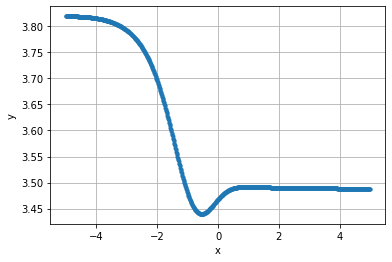

In [9]:
np_random=np.random.RandomState(0)
n0=Network(np_random)
n0.add(input_dim=1,n=3,activation='sigmoid')
n0.add(input_dim=3,n=3,activation='sigmoid')
n0.add(input_dim=3,n=3,activation='sigmoid')
n0.add(input_dim=3,n=3,activation='sigmoid')
n0.add(input_dim=3,n=1,activation='identity')

ys0=[n0.forward(x) for x in xs]
visualize(xs,ys0)

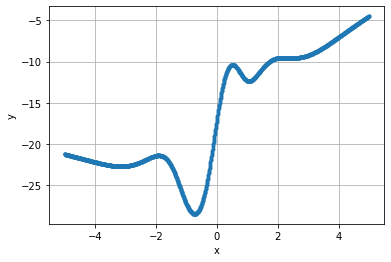

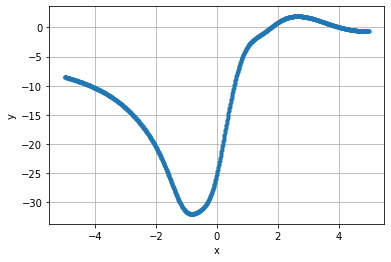

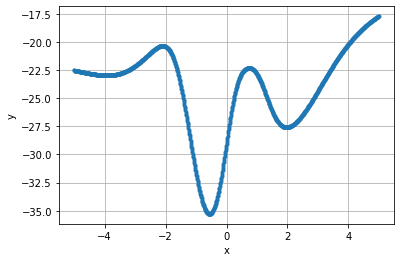

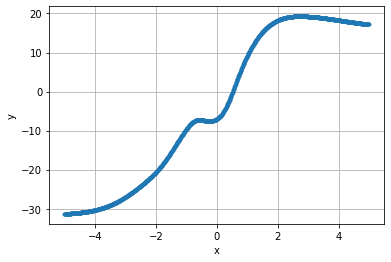

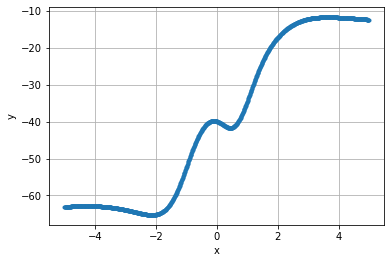

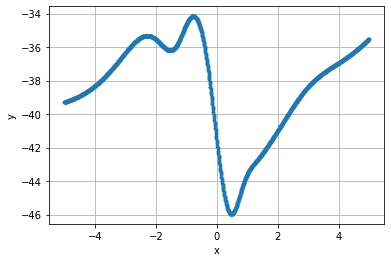

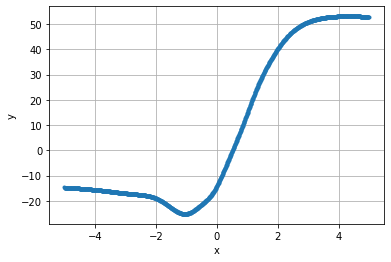

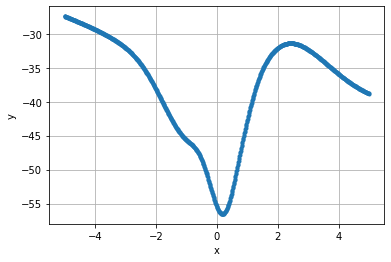

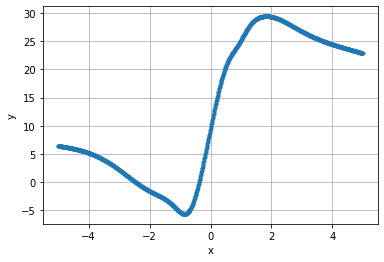

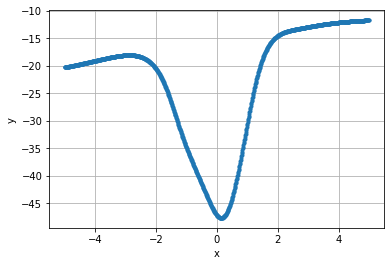

In [10]:
for seed in range(10):
    np_random = np.random.RandomState(seed)
    n1 = Network(np_random)
    n1.add(256, input_dim=1, activation='sigmoid')
    n1.add(1)
    ys1 = [n1.forward(x) for x in xs]
    visualize(xs, ys1)

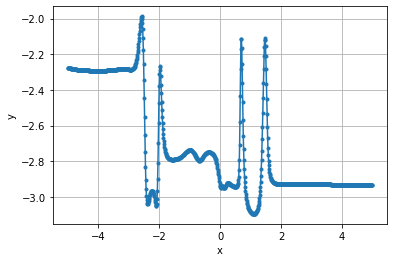

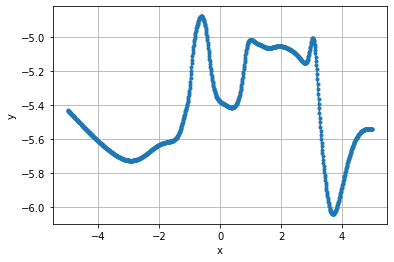

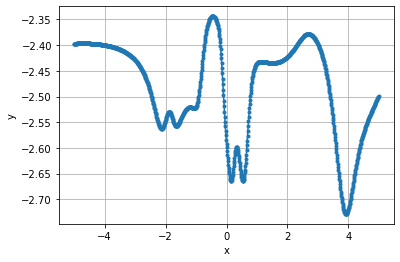

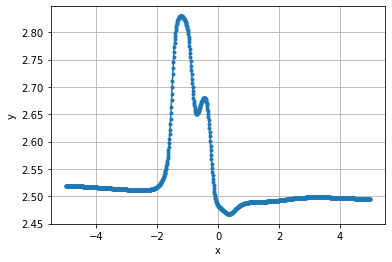

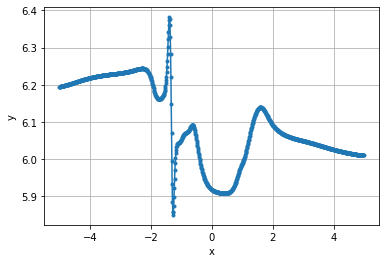

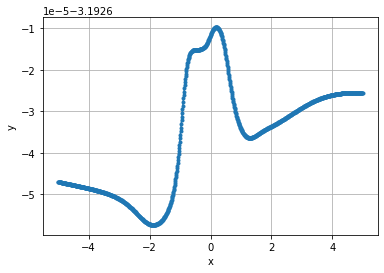

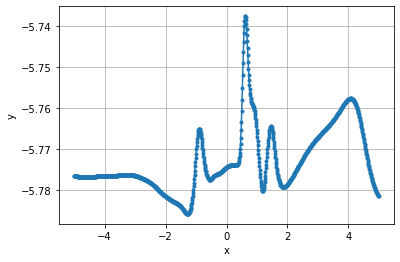

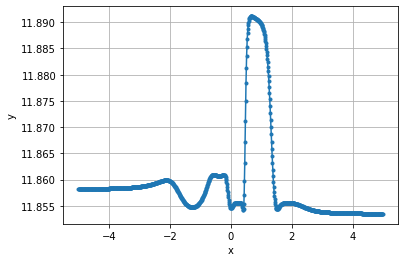

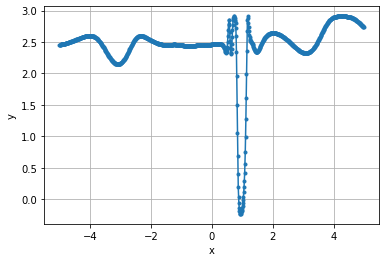

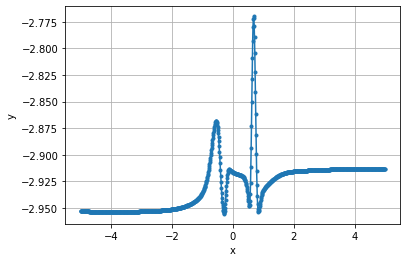

In [11]:
for seed in range(10):
    np_random = np.random.RandomState(seed)
    n2 = Network(np_random)
    n2.add(16, input_dim=1, activation='sigmoid')  # 1
    n2.add(16, activation='sigmoid')  # 2
    n2.add(16, activation='sigmoid')  # 3
    n2.add(16, activation='sigmoid')  # 4
    n2.add(16, activation='sigmoid')  # 5
    n2.add(16, activation='sigmoid')  # 6
    n2.add(16, activation='sigmoid')  # 7
    n2.add(16, activation='sigmoid')  # 8
    n2.add(16, activation='sigmoid')  # 9
    n2.add(16, activation='sigmoid')  # 10
    n2.add(16, activation='sigmoid')  # 11
    n2.add(16, activation='sigmoid')  # 12
    n2.add(16, activation='sigmoid')  # 13
    n2.add(16, activation='sigmoid')  # 14
    n2.add(16, activation='sigmoid')  # 15
    n2.add(16, activation='sigmoid')  # 16, 16*16=256
    n2.add(1)
    ys2 = [n2.forward(x) for x in xs]
    visualize(xs, ys2)

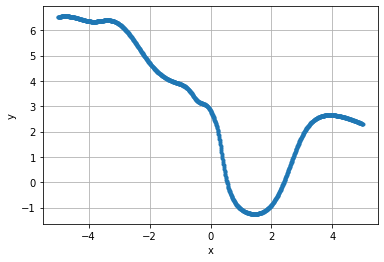

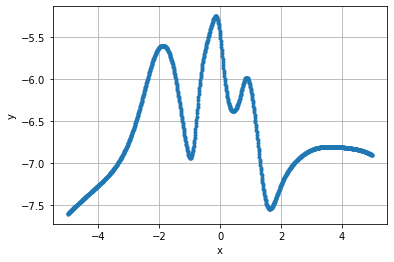

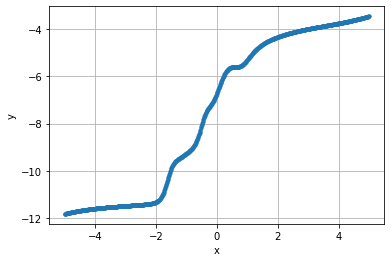

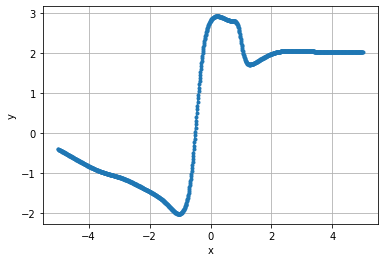

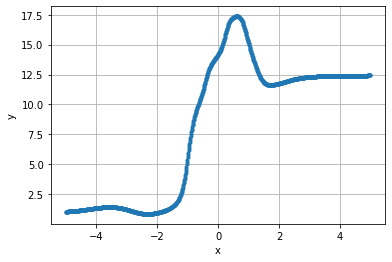

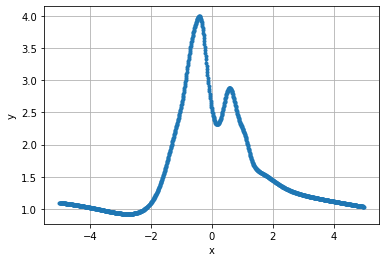

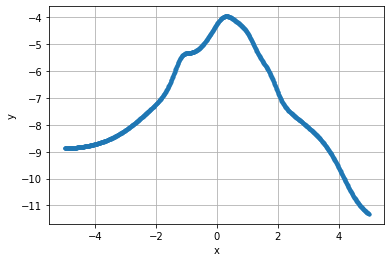

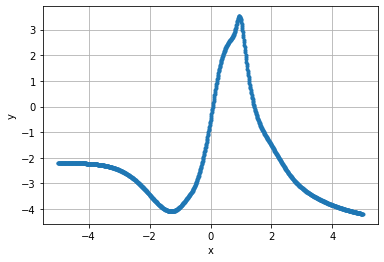

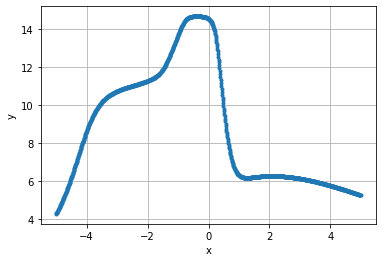

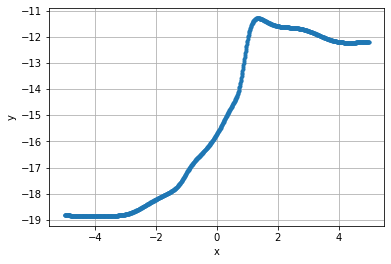

In [12]:
for seed in range(10):
    np_random = np.random.RandomState(seed)
    n3 = Network(np_random)
    n3.add(15, input_dim=1, activation='sigmoid')
    n3.add(16, activation='sigmoid')
    n3.add(15, activation='sigmoid')
    n3.add(1)
    ys3 = [n3.forward(x) for x in xs]
    visualize(xs, ys3)

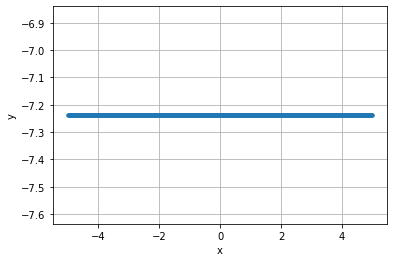

In [13]:
np_random = np.random.RandomState(seed)
n4 = Network(np_random)
n4.add(10, input_dim=1, activation='sigmoid')
for i in range(100):
    n4.add(10, activation='sigmoid')
n4.add(1)
ys4 = [n4.forward(x) for x in xs]
visualize(xs, ys4)